In [215]:
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import cellbell
import warnings
warnings.warn("once")
np.set_printoptions(precision=4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: once
  # This is added back by InteractiveShellApp.init_path()


In [102]:
#All
df = pd.read_csv('/Users/ianbury/Downloads/chckpt1.csv')
df = df[df.season_year >= 2013]
print(len(df))
print(df.player_id.nunique())
print(df.season_year.unique())

83760
3476
[2016 2017 2013 2014 2015]


In [282]:
#Plays from top 25 players only
df = pd.read_csv('/Users/ianbury/Downloads/top_plays_data.csv')
print(len(df))
print(df.player_id.nunique())
print(df.season_year.unique())

6765
209
[2017 2016 2015 2014 2013]


In [283]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [284]:
df.position.unique()

array(['WR', 'QB', 'TE', 'RB'], dtype=object)

In [285]:
pos=['QB','WR','RB','TE']

In [286]:
#Filtering to only offensive positions
df=df[df.position.isin(pos)]

In [287]:
df.columns

Index(['gsis_id', 'player_id', 'team', 'name_fixed', 'position', 'years_pro',
       'height', 'weight', 'start_time', 'week', 'day_of_week', 'season_year',
       'season_type', 'home_team', 'away_team', 'home_score', 'away_score',
       'fantasy_score', 'fumbles_rec_tds', 'fumbles_lost', 'passing_int',
       'passing_yds', 'passing_tds', 'passing_twoptm', 'receiving_rec',
       'receiving_tds', 'receiving_twoptm', 'receiving_yds', 'rushing_yds',
       'rushing_tds', 'rushing_twoptm', 'kicking_rec_tds', 'puntret_tds',
       'receiving_tar', 'rushing_att', 'passing_att', 'forecast', 'home',
       'Year', 'Week', 'team_id', 'city', 'name', 'temp', 'desc',
       'desc_simple', 'prev_score', 'avg3_score', 'avg5_score', 'avg3_tar',
       'avg5_tar', 'avg3_rush_att', 'avg5_rush_att', 'prev_tar',
       'prev_rush_att', 'prev_pass_att', 'avg3_pass_att', 'avg5_pass_att'],
      dtype='object')

In [288]:
df_clean = df.drop(columns=['gsis_id','player_id','name_fixed','years_pro','height','weight','forecast','home_score','away_score','season_type','desc','city','name','team_id','Year','Week','home','fumbles_rec_tds',
       'fumbles_lost', 'passing_int', 'passing_yds', 'passing_tds',
       'passing_twoptm', 'receiving_rec', 'receiving_tds', 'receiving_twoptm',
       'receiving_yds', 'rushing_yds', 'rushing_tds', 'rushing_twoptm',
       'kicking_rec_tds', 'puntret_tds', 'receiving_tar', 'rushing_att',
       'passing_att'])

In [289]:
def is_home(df):
    if df['home_team'] == df['team']:
        return 1
    else:
        return 0
df_clean['is_home'] = df_clean.apply(is_home, axis=1)
df_clean.drop('home_team',inplace=True,axis=1)

In [290]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['start_date'] = df_clean['start_time'].dt.date
df_clean['start_time'] = df_clean['start_time'].dt.time
df_clean.drop('start_date',inplace=True,axis=1)

In [291]:
#PCA


In [292]:
#F-test

In [293]:
df_clean=df_clean.dropna()

In [294]:
df_clean.columns

Index(['team', 'position', 'start_time', 'week', 'day_of_week', 'season_year',
       'away_team', 'fantasy_score', 'temp', 'desc_simple', 'prev_score',
       'avg3_score', 'avg5_score', 'avg3_tar', 'avg5_tar', 'avg3_rush_att',
       'avg5_rush_att', 'prev_tar', 'prev_rush_att', 'prev_pass_att',
       'avg3_pass_att', 'avg5_pass_att', 'is_home'],
      dtype='object')

In [295]:
dff=pd.get_dummies(df_clean,columns=['start_time','position','day_of_week','desc_simple','team','away_team'])


In [296]:
dff.columns

Index(['week', 'season_year', 'fantasy_score', 'temp', 'prev_score',
       'avg3_score', 'avg5_score', 'avg3_tar', 'avg5_tar', 'avg3_rush_att',
       ...
       'away_team_PHI', 'away_team_PIT', 'away_team_SD', 'away_team_SEA',
       'away_team_SF', 'away_team_STL', 'away_team_TB', 'away_team_TEN',
       'away_team_UNK', 'away_team_WAS'],
      dtype='object', length=117)

In [297]:
X=dff.drop(['fantasy_score','season_year',],axis=1)
y=dff.fantasy_score.values.reshape(-1,1)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [299]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_train)
lm.score(X_train,y_train)

0.2562231964131204

In [243]:
y_pred = lm.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE: '+str(mse))
print('RMSE: '+str(np.sqrt(mse)))
print('Mean Score: '+str(np.mean(y_test)))

MSE: 54.16060161778405
RMSE: 7.359388671471568
Mean Score: 12.560881834215168


In [244]:
res = y_pred - y_test

In [245]:
len(res)

1134

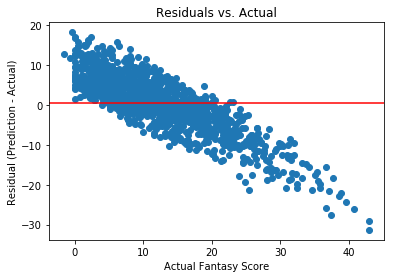

In [246]:
_=plt.scatter(y_test,res)
_=plt.ylabel('Residual (Prediction - Actual)')
_=plt.xlabel('Actual Fantasy Score')
_=plt.axhline(y=0.5, color='r', linestyle='-')
_=plt.title('Residuals vs. Actual')

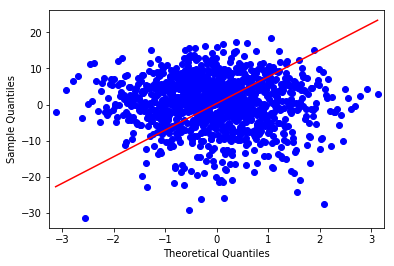

In [247]:
sm.qqplot(res,line='s')
plt.show()

In [248]:
lm.coef_

array([[-1.6180e-01,  5.1097e-03,  2.2316e-02, -8.8083e-02,  1.3725e-01,
         2.9291e-01,  1.9389e-01,  1.4483e-01,  2.7226e-02, -1.4110e-01,
         6.3207e-02, -5.8564e-03,  1.7882e-01, -1.4133e-01,  6.8661e-01,
        -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11,
        -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11,
        -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11,
        -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11, -1.6551e+11,
        -8.0091e+10, -8.0091e+10, -8.0091e+10, -8.0091e+10, -7.6949e+10,
        -7.6949e+10, -7.6949e+10, -7.6949e+10, -3.9226e+10, -3.9226e+10,
        -3.9226e+10, -3.9226e+10, -9.9792e+09, -9.9792e+09, -9.9792e+09,
        -9.9792e+09, -9.9792e+09, -9.9792e+09, -9.9792e+09, -9.9792e+09,
        -9.9792e+09, -9.9792e+09, -9.9792e+09, -9.9792e+09, -9.9792e+09,
        -9.9792e+09, -9.9792e+09, -9.9792e+09, -9.9792e+09, -9.9792e+09,
        -9.9792e+09, -9.9792e+09, -9.9792e+09, -9.9

In [249]:
cv_results = cross_val_score(lm,X_train,y_train,cv=10)

In [250]:
np.mean(cv_results)

0.1957933756863645

In [251]:
en = ElasticNet(tol=0.35)
l1_space= np.linspace(0,1,25)

param_grid = {'l1_ratio':l1_space}
gs = GridSearchCV(en,param_grid, cv=5)
gs.fit(X_train,y_train)
print('Training Fit: '+str(gs.score(X_train,y_train)))
y_pred = gs.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE: '+str(mse))
print('RMSE: '+str(np.sqrt(mse)))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Training Fit: 0.1767334897388958
MSE: 57.358120326571175
RMSE: 7.573514397330421


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [252]:
r=Ridge(normalize=True)
alpha_space = np.logspace(-4, 0, 50)
params = {'alpha':alpha_space}
gs_r = GridSearchCV(r,params,cv=5)
gs_r.fit(X_train,y_train)
print(gs_r.score(X_train,y_train))
y_pred = gs_r.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))

0.2460758836462733
54.07730672161598
7.353727403270805


In [253]:
l = Lasso(tol=0.25)
alpha_space = np.logspace(-4, 0, 50)
params = {'alpha':alpha_space}
gs_l = GridSearchCV(l,params,cv=5)
gs_l.fit(X_train,y_train)
print(gs_l.score(X_train,y_train))
y_pred = gs_l.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))

0.23994776732209477
53.234183473888876
7.296175948665772


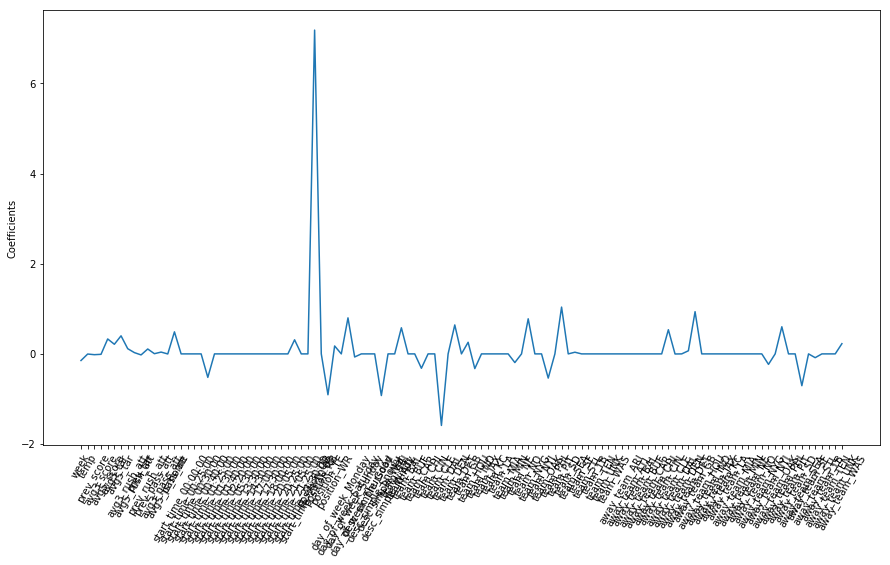

In [185]:
names = X.columns
plt.figure(figsize=(15,8))
_=plt.plot(range(len(names)),gs_l.best_estimator_.coef_)
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel('Coefficients')

In [254]:
aa = pd.DataFrame({'Factor':np.array(list(X.columns)),'Coefficient':gs_l.best_estimator_.coef_})

In [255]:
aa.sort_values('Coefficient',ascending=False)

,Factor,Coefficient
35,position_QB,6.121430
67,team_NO,1.752890
38,position_WR,1.513958
58,team_GB,1.299401
105,away_team_PHI,1.250169
72,team_PIT,1.085424
114,away_team_WAS,1.028500
43,desc_simple_Good,1.005620
68,team_NYG,0.989031
92,away_team_GB,0.761190


In [302]:
print(dff.columns)

Index(['week', 'season_year', 'fantasy_score', 'temp', 'prev_score',
       'avg3_score', 'avg5_score', 'avg3_tar', 'avg5_tar', 'avg3_rush_att',
       ...
       'away_team_PHI', 'away_team_PIT', 'away_team_SD', 'away_team_SEA',
       'away_team_SF', 'away_team_STL', 'away_team_TB', 'away_team_TEN',
       'away_team_UNK', 'away_team_WAS'],
      dtype='object', length=117)


In [303]:
#RandomForest
#Start with new training data, including categorical variables.
dff = pd.get_dummies(dff)
X=dff.drop('fantasy_score',axis=1)
y=dff.fantasy_score.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
rf=RandomForestRegressor()

#gs_rf = GridSearchCV(rf,random_grid,cv=3)
rf.fit(X_train,y_train.ravel())
rf.score(X_train,y_train)

0.8460483678345914

In [304]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test,y_pred)

58.62239638859494

In [79]:
rf=RandomForestRegressor()

gs_rf = RandomizedSearchCV(rf,random_grid,cv=5)
gs_rf.fit(X_train,y_train.ravel())
gs_rf.score(X_train,y_train)

0.4859785701209889

In [80]:
y_pred_random = gs_rf.predict(X_test)
mean_squared_error(y_test,y_pred_random)

52.612039151899424

In [81]:
gs_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
gs_rf.best_params_

{'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [306]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [308]:
#Let's split by position first and re-run.
dfs = {}
for p in df_clean['position'].unique():
    dfs[p] = df_clean[df_clean.position==p]


In [309]:
#Adding dummies
for p in dfs:
    dfs[p]=pd.get_dummies(dfs[p],columns=['start_time','day_of_week','desc_simple','away_team','team'])

In [311]:
len(df_clean)

4533

In [310]:
for p in pos:


    X=dfs[p].drop(['fantasy_score','position','season_year'],axis=1)
    y=dfs[p].fantasy_score.values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
    rf=RandomForestRegressor()
    gs_rf = RandomizedSearchCV(rf,random_grid,cv=5)
    gs_rf.fit(X_train,y_train.ravel())

    
    print(p)
    print('Training Fit: '+str(gs_rf.score(X_train,y_train)))
    y_pred = gs_rf.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    
    print('MSE: '+str(mse))
    print('RMSE: '+str(np.sqrt(mse)))
    print('Mean score: '+str(np.mean(y_test)))
    print('----------')

QB
Training Fit: 0.5251788532283282
MSE: 54.8756250357274
RMSE: 7.40780838276257
Mean score: 18.273125
----------
WR
Training Fit: 0.3296214789373212
MSE: 56.10992033842831
RMSE: 7.490655534626346
Mean score: 12.946105919003118
----------
RB
Training Fit: 0.5752510747734676
MSE: 49.039519166885505
RMSE: 7.002822228707902
Mean score: 11.420973782771537
----------
TE
Training Fit: 0.6141070665701789
MSE: 38.37650148750813
RMSE: 6.194877035705239
Mean score: 7.816923076923076
----------


In [279]:
clfs={}
for p in pos:
    X=dfs[p].drop(['fantasy_score','position','season_year','team'],axis=1)
    y=dfs[p].fantasy_score.values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
    l = Lasso(tol=0.4)
    alpha_space = np.logspace(-4, 0, 50)
    params = {'alpha':alpha_space}
    gs_l = GridSearchCV(l,params,cv=5)
    gs_l.fit(X_train,y_train)
    clfs[p]=gs_l
    print(p)
    print('Training Fit: '+str(gs_l.score(X_train,y_train)))
    y_pred = gs_l.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    print('MSE: '+str(mse))
    print('RMSE: '+str(np.sqrt(mse)))
    print('Mean score: '+str(np.mean(y_test)))
    print('----------')

QB
Training Fit: 0.09095373884576086
MSE: 51.01710063740782
RMSE: 7.142625612294671
Mean score: 18.273125
----------
WR
Training Fit: 0.008359406497424615
MSE: 57.19735880784763
RMSE: 7.56289354730368
Mean score: 12.946105919003118
----------
RB
Training Fit: 0.14488010076436886
MSE: 53.14092587096577
RMSE: 7.28978229242587
Mean score: 11.420973782771537
----------
TE
Training Fit: 0.10011580090766824
MSE: 39.16014477213987
RMSE: 6.257806706198257
Mean score: 7.816923076923076
----------


In [280]:
aa = pd.DataFrame({'Factor':np.array(list(X.columns)),'Coefficient':gs_l.best_estimator_.coef_})

In [281]:
aa.sort_values('Coefficient',ascending=False)

,Factor,Coefficient
4,avg5_score,0.199608
3,avg3_score,0.186035
6,avg5_tar,0.142910
5,avg3_tar,0.116768
1,temp,0.005456
38,desc_simple_Good,-0.000000
50,away_team_DAL,-0.000000
56,away_team_JAX,-0.000000
55,away_team_IND,0.000000
54,away_team_HOU,-0.000000
